In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [57]:
print('Reading in the data...')
agg = pd.read_csv('sku_labels.csv')
feat = pd.read_csv('extracted_features.csv')
df = pd.read_csv('som_clusters.csv')
df.columns = ['sku_key', 'cluster']
feat.dropna(axis=1, inplace=True)
names = feat.columns[1:]
scale = MinMaxScaler()
skus = feat['id']
feat.set_index('id', inplace=True)
X = scale.fit_transform(feat)
y = df['cluster']

Reading in the data...


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
cf = RandomForestClassifier()

In [60]:
cf.fit(X_train, y_train)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
y_pred = cf.predict(X_test)

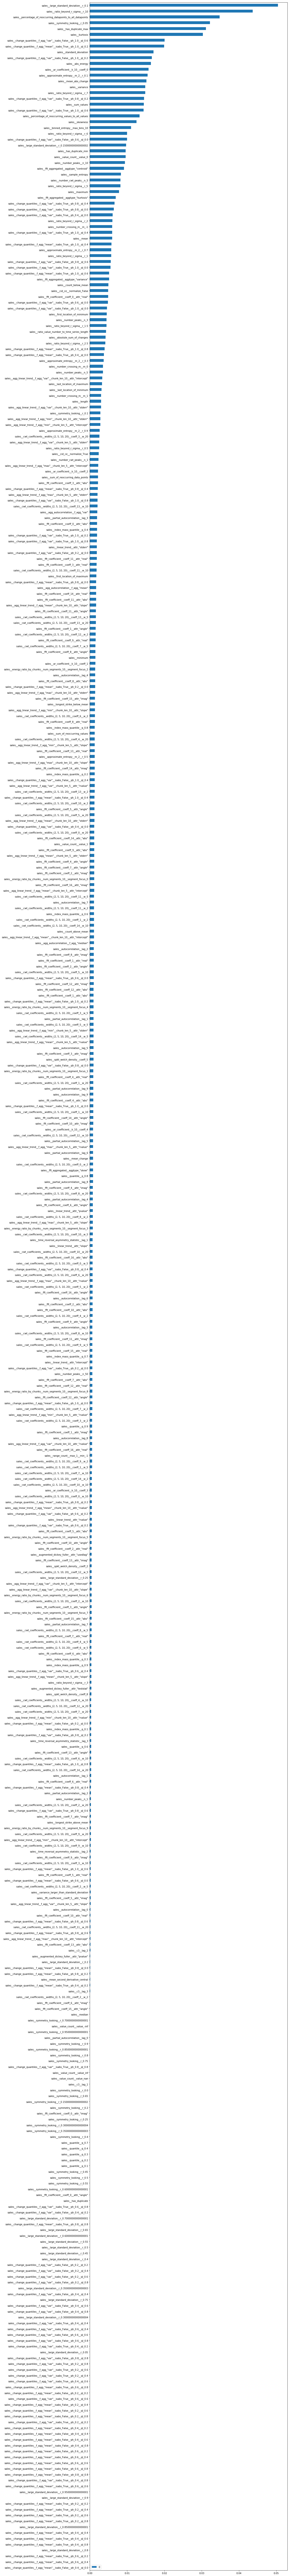

In [55]:
f, ax = plt.subplots(figsize=(15,200))
pd.DataFrame(cf.feature_importances_, index=names).sort_values(0).plot(kind='barh', ax=ax)
plt.show()

In [62]:
print(metrics.confusion_matrix(y_test, y_pred), '\n \n')
print(metrics.classification_report(y_test, y_pred))

[[ 55   0   0   8   8   5]
 [  0  81   0   0  17  13]
 [  7   0  77   2   8   0]
 [  4   1   4  98   0   1]
 [  3  13  13   0 251   1]
 [  3  12   3   2   3 106]] 
 

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        76
           1       0.76      0.73      0.74       111
           2       0.79      0.82      0.81        94
           3       0.89      0.91      0.90       108
           4       0.87      0.89      0.88       281
           5       0.84      0.82      0.83       129

   micro avg       0.84      0.84      0.84       799
   macro avg       0.82      0.82      0.82       799
weighted avg       0.84      0.84      0.84       799

